In [1]:
import tweepy

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')

In [8]:
consumer_key='PorOmG8CF82W7eR4z3xi2xL9M'
consumer_secret_key='9hHoBTyEd9g01bHMr6ob9FxSf4Da8oPaLDw3niihHWCjiYdxlY'
access_token='3932659632-epHdmcvh7qYSSaBQgLqWka9SJk6FLTIIQHye7Tq'
access_token_Secret='2TyMzuYjkkOcibTVyQ1o4G27p6aO7SD3osC38QYfrCrVW'

In [9]:
#creating authentication object
authenticate=tweepy.OAuthHandler(consumer_key,consumer_secret_key)
#set the access token and access token secret
authenticate.set_access_token(access_token,access_token_Secret)
#create API object  while passing in the auth information
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [15]:
#extract 1000 tweets from twitter user
posts=api.user_timeline(screen_name='BillGates',count=100,language='en',tweet_mode='extended')
#print the last 5 tweets from the account
print('5 recent tweets')
i=1
for tweet in posts[0:5]:
  print(str(i)+ ') '+tweet.full_text + '\n')
  i=i+1

5 recent tweets
1) RT @melindagates: I’m grateful for new commitments from the EU, Germany, Canada, Japan, and the U.S. to help make safe and effective COVID-…

2) I’m inspired by @DonCheadle’s activism and humanitarian work. Thanks to @lawacthevents and @writersblocla for hosting our discussion about climate change and how everyone can help. https://t.co/tPGhgu8C30

3) @smh Thanks @GregCallaghan1 for talking with me about this challenge and why we need to act now.

4) Meaningful action from business leaders will require the courage to take risks that many companies aren't used to taking. https://t.co/bYZNz7Ohf8

5) Thanks to @andersoncooper, @SeaArtsLectures, and everyone who joined our virtual conversation about climate change. Great to have so much support from my hometown for this important work. https://t.co/F2FB6GUIAj



In [31]:
#create a dataframe with a column called Tweets
df=pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head(5)

,Tweets
0,RT @melindagates: I’m grateful for new commitm...
1,I’m inspired by @DonCheadle’s activism and hum...
2,@smh Thanks @GregCallaghan1 for talking with m...
3,Meaningful action from business leaders will r...
4,"Thanks to @andersoncooper, @SeaArtsLectures, a..."


In [32]:
#data cleaning
def clean(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text)#removes @mentions
  text=re.sub(r'#','',text)#removes hashtags
  text=re.sub(r'RT[\s]+','',text)#removing rt
  text=re.sub(r'https?:\/\/\S+','',text)#remove hyperlinks
  text=re.sub(r'[^\w\d\s]', '',text)#removing punctuations
  text=re.sub(r'^\s+|\s+?$', '',text)#removing trailing and leading whitespace
  return text
#preprocessing the text
df['Tweets']=df['Tweets'].apply(clean)
#printing the df
df

,Tweets
0,Im grateful for new commitments from the EU Ge...
1,Im inspired by s activism and humanitarian wor...
2,Thanks for talking with me about this challen...
3,Meaningful action from business leaders will r...
4,Thanks to and everyone who joined our virtua...
...,...
95,The only way to eliminate the threat of COVID1...
96,Understanding this concept can help us measure...
97,Developing and manufacturing vaccines wont end...
98,Great to see the UK commit vital funding to en...


In [33]:
#create a function to get the subjectivity
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity
#create a function to get the polarity
def polarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity']=df['Tweets'].apply(subjectivity)
df['Polarity']=df['Tweets'].apply(polarity)
df

,Tweets,Subjectivity,Polarity
0,Im grateful for new commitments from the EU Ge...,0.584848,0.412121
1,Im inspired by s activism and humanitarian wor...,0.200000,0.200000
2,Thanks for talking with me about this challen...,0.200000,0.200000
3,Meaningful action from business leaders will r...,0.366667,0.366667
4,Thanks to and everyone who joined our virtua...,0.537500,0.400000
...,...,...,...
95,The only way to eliminate the threat of COVID1...,0.872222,0.150000
96,Understanding this concept can help us measure...,0.100000,0.100000
97,Developing and manufacturing vaccines wont end...,0.433333,0.111111
98,Great to see the UK commit vital funding to en...,0.418750,0.325000


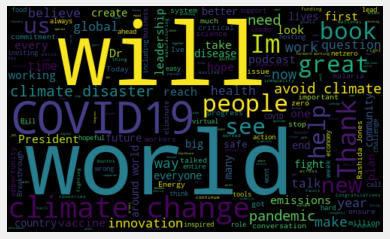

In [35]:
#visualising word cloud
all_words=' '.join([twts for twts in df['Tweets']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(all_words)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
#function for negative, neutral, positive analysis
def analysis(score):
  if (score<0):
    return 'Negative'
  elif (score==0):
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(analysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Im grateful for new commitments from the EU Ge...,0.584848,0.412121,Positive
1,Im inspired by s activism and humanitarian wor...,0.200000,0.200000,Positive
2,Thanks for talking with me about this challen...,0.200000,0.200000,Positive
3,Meaningful action from business leaders will r...,0.366667,0.366667,Positive
4,Thanks to and everyone who joined our virtua...,0.537500,0.400000,Positive
...,...,...,...,...
95,The only way to eliminate the threat of COVID1...,0.872222,0.150000,Positive
96,Understanding this concept can help us measure...,0.100000,0.100000,Positive
97,Developing and manufacturing vaccines wont end...,0.433333,0.111111,Positive
98,Great to see the UK commit vital funding to en...,0.418750,0.325000,Positive


In [40]:
#print all the positive words
j=1
sorteddf=df.sort_values(by=['Polarity'])
for i in range(0,sorteddf.shape[0]):
  if (sorteddf['Analysis'][i]=='Positive'):
    print(str(j)+') '+sorteddf['Tweets'][i])
    print()
    j+=1


1) Im grateful for new commitments from the EU Germany Canada Japan and the US to help make safe and effective COVID

2) Im inspired by s activism and humanitarian work Thanks to  and  for hosting our discussion about climate change and how everyone can help

3) Thanks  for talking with me about this challenge and why we need to act now

4) Meaningful action from business leaders will require the courage to take risks that many companies arent used to taking

5) Thanks to   and everyone who joined our virtual conversation about climate change Great to have so much support from my hometown for this important work

6) Great to see this important step as the United States resumes our global leadership on climate change Looking forward to working with  and Congress on a plan to ensure we reach net zero by 2050

7) Thanks to  for hosting the launch of my virtual book tour It was great to hear so many thoughtful questions about what we can all do to help avoid a climate disaster

8) Bill Gat

In [41]:
#print negative tweets
j=1
sorteddf=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sorteddf.shape[0]):
  if (sorteddf['Analysis'][i]=='Negative'):
    print(str(j)+') '+sorteddf['Tweets'][i])
    print()
    j+=1

1) The Weekly Planet Lately Bill Gates has been thinking about what he calls the hard stuff of climate change These hard

2) People who think a plan is easy are wrong People who think a plan is impossible are wrong Its super hard and very broad

3) Only 3 of Black students learn computer science in high school or beyond Please watch and share this video Inspire a studen

4) COVID19 has cost lives sickened millions and thrust the global economy into a devastating recession But hope is on the horizon

5) Here are four other ways that America can advance its leadership on climate change this year and put the world on a path to zero emissions by 2050

6) The Presidents commitment to reengage with the world gives me hope that the recovery will reach everyone including communities of color in the US and people in poor countries around the world

7) We need to revolutionize the worlds physical economyand that will take among other things a dramatic infusion of ingenuity funding and focus from

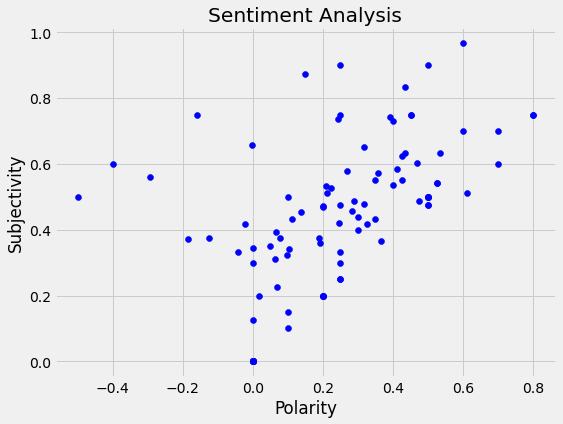

In [42]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [45]:
#get the percentage of positive and negative tweets
positive=df[df.Analysis=='Positive']
positive=positive['Tweets']
#print(positive)
print(round((positive.shape[0]/df.shape[0])*100,1))
negative=df[df.Analysis=='Negative']
negative=negative['Tweets']
#print(negative)
print(round((negative.shape[0]/df.shape[0])*100,1))

77.0
9.0


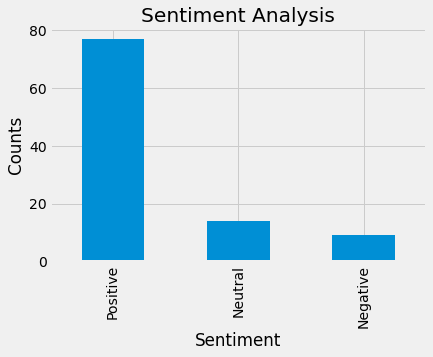

In [47]:
#show the value counts
df['Analysis'].value_counts()
#visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()